###### 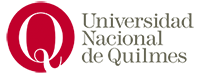

### Trabajo Final - Conceptos Básicos de Inteligencia Artificial



<h1><center>Uso de eucaliptos para la conservación de suelos en Nueva Zelanda</center></h1>

  

<h4><center>Abigail Stricker</center></h4>
<h4><center>Profesor: Carolina Salto</center></h4>
<h4><center>Cohorte: Septiembre 2022 - Maestría en Bioinformática y Biología de Sistemas</center></h4>


  

***
## Abstract

La plantación de árboles en tierras de ganadería es una práctica común para evitar la erosión que el pastoreo y el uso continuo conllevan. El eucalipto es una clase de árbol muy presente a lo largo de toda Australia y Nueva Zelanda, donde se plantan para generar refugios naturales y conservar los suelos. En 1979 se hizo una plantación controlada de eucaliptos en zonas cercanas a tierras de pastoreo, que fue evaluada exhaustivamente en 1986 y 1991. De acuerdo con la evaluación de ciertas características de los árboles y el estado de las tierras, diferentes investigadores seleccionaron grupos de *Eucalyptus* para proteger a los suelos de la erosión. Usando herramientas de *data mining* y el *dataset* generado en la evaluación de 1991, se pudo comprobar que especies *E. amplifolia*, *E. coccifera* y *E. pulchella*son las que mayor protección de suelos proveen. Las variables diámetro de la base del árbol y altura están fuertemente relacionadas con la conservación de la calidad de las tierras.
***

## Introducción 
Regiones montañosas en la Isla Norte de Nueva Zelanda fueron taladas de su bosque nativo para ser usada en agricultura de pastoreo. El problema en estas prácticas surge ya que más del 25% de la isla es propensa a la erosión. Para evitar que se erosione y quede inutilizable, las tierras son reforestadas con árboles resistentes a sequías. Por cuestiones utilitarias los más usados son los del género Eucalyptus. Ha habido algunas pruebas de control de calidad de suelo en lugares de plantaciones de eucaliptos donde se observaron buenos resultados.

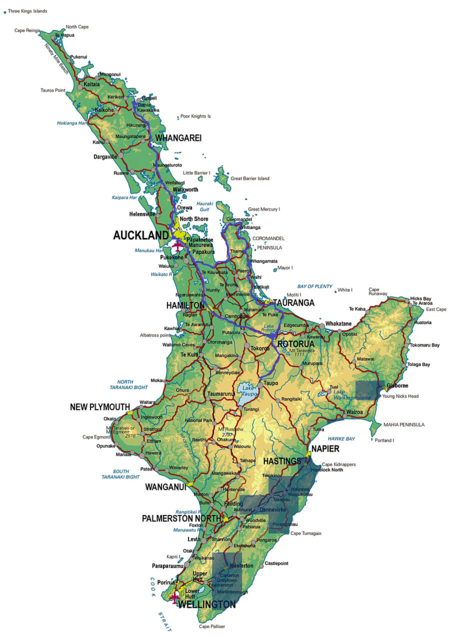
<center><i>Figura 1. Mapa de la isla norte de Nueva Zelanda. En azul se marca las regiones donde se obtuvieron las muestras de Eucalyptus.</i></center>

Aun así no hay una utilización intensiva debido a la ausencia de una evaluación sistemática. Uno de los primeros trabajos exhaustivos surgió en 1986 por parte de Hathaway y colaboradores, donde se midieron diversas características de los eucaliptos y el estado del suelo para determinar las mejores especies para conservar las tierras afectadas. Estos investigadores definieron la altura de los árboles como la principal medida de performance. Una lista de especies surgió de la comparativa entre altura y conservación de suelos, mostrado en la tabla 1. A pesar de que hay variedad de especies disponibles para su uso la prevención de erosión, algunas de ellas también fueron clasificadas como potenciales generadores de erosión al desestabilizar la tierra de las regiones de interés.

|Adecuados para todo tipo de terreno | Potenciales desetabilizadores de terreno|
| --- | --- |
|         Eucalyptus cordata          |               E.fastigata                |
|            E. fastigata             |              E.fraxinoides               |
|           E. fraxinoides            |                E. obliqua                |
|             E. obliqua              |                E. regnans                |
|             E.pulchella             |                                          |
|             E. regnans              |                                          |

<center><i>Tabla 1. Lista de especies clasificados mediante observación de los investigadores.</i></center>

Una segunda investigación de 1991 da lugar al dataset utilizado en este trabajo. Se midieron las mismas zonas y árboles que en el primer análisis, pero se definieron otras características como medidas de performance. Estos son: diámetro de la base del árbol multiplicado por su altura (DBH), altura y porcentaje de supervivencia respecto a total de árboles de esa especie plantados. En este análisis se observó que los árboles más grandes sirven para la mayoría de las zonas conservadas y de agroforestación, mientras que los de menor crecimiento son mejores para tierras de pastoreo. Se determinaron 14 especies de Eucalyptus útiles: *E. regnans, E. obliqua, E.fastigata, E. botryoides, E. botryoides x saligna, E. nitens, E.fraxinoides, E. sieberi, E. delegatensis, E. viminalis, E. globoidea, E. smithii* y *E. oreades*. En estas exploraciones previas no se logró tener una característica clara que sirva para predecir la utilidad de los diferentes árboles para conservar el suelo; a su vez las especies seleccionadas como conservadoras varían bastante entre ambos análisis. 

'Agregar data sobre lo "interesante" y "util" del uso de random forest para definir que features definen mas un output esperado y así saber que caracteristicas en un grupo (en este caso nuestros arboles) son mas importantes.'



El uso de algoritmos de aprendizaje para comprender mejor la contribución de cada *feature* a la clasificación y predicción de modelos de árboles de desición. El más simple y útil de aplicar es *Random Forest*. Básicamente, este algoritmo genera múltiples árboles de desición usando en cada uno de ellos muestras aleatorias del dataset. Luego se "vota" sobre las clasificaciones de todos los árboles y los que tienen mayor cantidad de votos se consideran como la predicción final. 

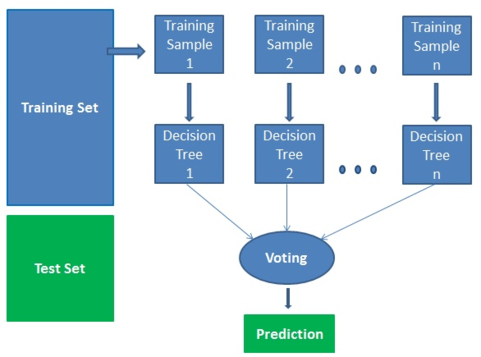
<center><i>Figura 2. Pasos de funcionamiento de Random Forest.</i></center>

*Random Forest* se considera como uno de los métodos más robustos, además de que no se ve afectado por problemas de *overfitting*, y, siendo lo más importante en el presente trabajo, da un valor de importancia de cada *feature*. Con esta evaluación de importancia se podrá definir qué características son más importantes para la conservación del suelo. 

***

## Metodología y Resultados




### Tratamiento del dataset
Se utilizó el dataset original del grupo de investigación de Bulloch et al. en 1991. Ésta contiene tanto columnas de datos del contexto de crecimiento de los árboles medidos (Altitud respecto al mar, Precipitaciones, entre otros) y datos respecto a las características intrínsecas de los árboles (Altura, Supervivencia, Diámetro de tronco, entre otros). Este trabajo está enfocado en la importancia de las características de los *Eucalyptus* para mejorar la erosiòn, por lo que se creó un subconjunto con las columnas del segundo grupo y se trabajó con este subset. 
Una exploración del mismo mostró presencia de valores no determinados (NAs). Los NAs perjudican fuertemente todo tipo de análisis de datos. Para resolverlos se probaron dos opciones. Una fue la eliminación de todas las muestras que contengan NAs; 13% de las entradas eran eliminadas. A pesar de no ser un número alto, era probable que estas eliminaciones estén concentradas en muestras de ciertas regiones geográficas. Para evitar el sesgo del nuevo dataset a nivel geográfico, se prefirió usar la segunda opción: reemplazar los NAs mediante una función de interpolación lineal.



In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file = pd.read_csv("C:\\Users\\amari\\Desktop\\TP final IA\\dataset_194_eucalyptus.csv", usecols=[0,1,9,11,12,13,14,15,16,17,18,19],na_values=['?'],keep_default_na=False)
file.head()
file.tail()
len(file.index)
#Eliminacion de filas con valores NaN 
nona_file=file.dropna()
len(nona_file.index)
#Se eliminan 94 filas. 

#Guardado de dataset con NaN interpolados
from pathlib import Path
interpolnan_file=file.interpolate()
out1 = Path('C:\\Users\\amari\\Desktop\\TP final IA\\interpolate_file.csv')
interpolnan_file.to_csv(out1, index=False)

El siguiente paso es la detección y eliminación de *outliers*. Estos son valores que difieren significativamente del resto de las observaciones. 

<AxesSubplot:>

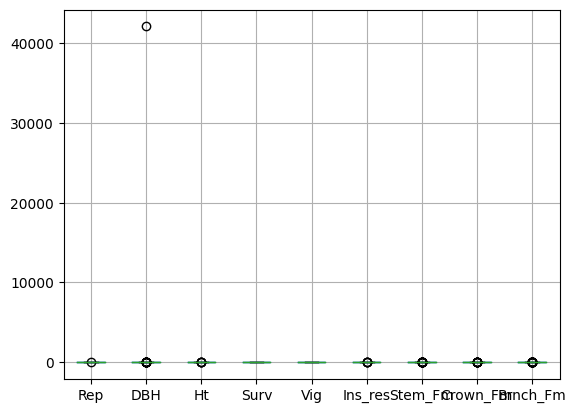

In [111]:
# Detectar outliers DBH
interpolnan_file.boxplot()

Puede observarse que la característica *DBH* tiene presencia de valores atípicos (*outliers*) mucho más pronunciados que cualquiera de las otras. El método más recomendado para realizarlo es por rango intercuartil (IQR). Se aplicó usando *DBH* como selector. 

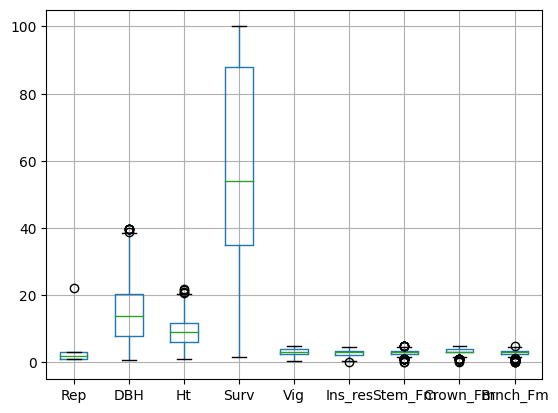

In [112]:
# Eliminar outliers por IQR - voy a tener que eliminar las rows que no cumplan con el criterio IQR
Q1 = interpolnan_file['DBH'].quantile(0.25)
Q3 = interpolnan_file['DBH'].quantile(0.75)
IQR = Q3 - Q1
# Se filtran los datos para retener aquellos valores que esten entre Q1 -1.5QR y Q3 +1.5QR
filtered_dataset = interpolnan_file.query('(@Q1 - 1.5 * @IQR) <= DBH <= (@Q3 + 1.5 * @IQR)')
filtered_dataset.boxplot()


out3 = Path('C:\\Users\\amari\\Desktop\\TP final IA\\eucalyptus_filtered.csv')
filtered_dataset.to_csv(out3, index=False)

### Definición de features más importantes para la utilidad de los árboles
Para definir cuáles características son más importantes para la utilidad de los árboles, se usó *Random Forest*. Se cargó el dataset limpiado de NAs y outliers, definiendo las características intrínsecas de los árboles como *features*, diviendo el dataset en 70% para entrenamiento y el 30% para prueba. 

In [113]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

#Carga del dataset a utilizar y exploracion del mismo
data=pd.read_csv("C:\\Users\\amari\\Desktop\\TP final IA\\eucalyptus_filtered.csv")
data.columns
data.head() 
#Importar la funcion para particionar el dataset en set de entrenamiento y set de testeo 
from sklearn.model_selection import train_test_split
X=data[['DBH','Ht','Surv','Vig','Ins_res','Stem_Fm','Crown_Fm','Brnch_Fm']]  # Features a tener en cuenta
y=data['Utility']  # Labels
#Particionar el dataset en set de entrenamiento y set de testeo. Se usa el 70% del dataset para  entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=42, test_size=0.3)

In [114]:
#Generacion del random forest para encontrar las features más importantes
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)


import numpy as np
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

#### MDI
Primero se evaluaron las *features* mediante MDI. Básicamente, MDI es la medición de la pureza de los nodos generados en los árboles de desición del *Random forest*. Cuanto más puros sean éstos, más importante se vuelve la *feature* que lo impacta. Un punto a destacar de MDI es que se vuelve engañosa cuando las *features* tienen muchos valores únicos (no repetidos). 

Importancias medidas en MDI
feature 0    0.155978
feature 1    0.146100
feature 2    0.153859
feature 3    0.187080
feature 4    0.104104
feature 5    0.094365
feature 6    0.085855
feature 7    0.072659
dtype: float64


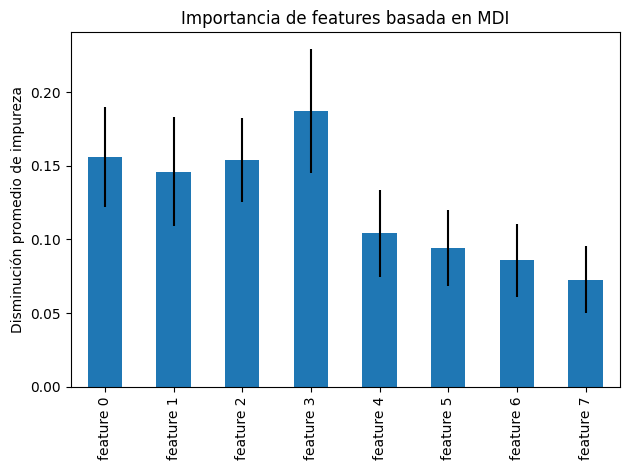

In [115]:
#Grafica de importancia de features

forest_importances = pd.Series(importances, index=feature_names)
print("Importancias medidas en MDI")
print(forest_importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Importancia de features basada en MDI")
ax.set_ylabel("Disminución promedio de impureza")
fig.tight_layout()

|Feature | Num. de Feature| Característica |
| :---: | :---: | :---:|
|         DBH         |               0              |  Diamétro de tronco principal |
|            Ht       |              1               | Altura |
|           Surv      |               2              | Supervivencia |
|             Vig     |                3             | Vigor |
|             Ins_res |                 4            | Resistencia a insectos |
|             Stem_Fm |                  5           | Forma del tronco principal |
|             Crown_Fm|                  6           | Forma de corona |
|             Brnch_Fm|                  7           | Forma de ramas |

<center><i>Tabla 2. Lista de características disponibles de los árboles ("Features").</i></center>

De acuerdo a MDI, las features de mayor importancia serían *Vig*, *Ht*, *DBH* y *Surv*. Éstas son el vigor de crecimiento, la altura, diámetro del tronco principal y supervivencia. 

#### Permutación
También se evaluaron las *features* mediante permutación. En esta evaluación se toma un valor de una *feature* y se cambia de posición aleatoriamente dentro de su columna. Luego de hacerlo, se compara la puntuación del modelo usando la *feature* cambiada con la puntuación del modelo con la *feature* original. Si esta puntuación disminuye, significa que el modelo depende de esa *feature*. Hay que destacar que la permutación de *features* no se ve afectada por la presencia de valores no repetidos. 

Importancias medidas en permutación
feature 0    0.025000
feature 1   -0.005093
feature 2    0.100926
feature 3    0.161111
feature 4    0.024537
feature 5    0.029167
feature 6    0.025000
feature 7   -0.007407
dtype: float64


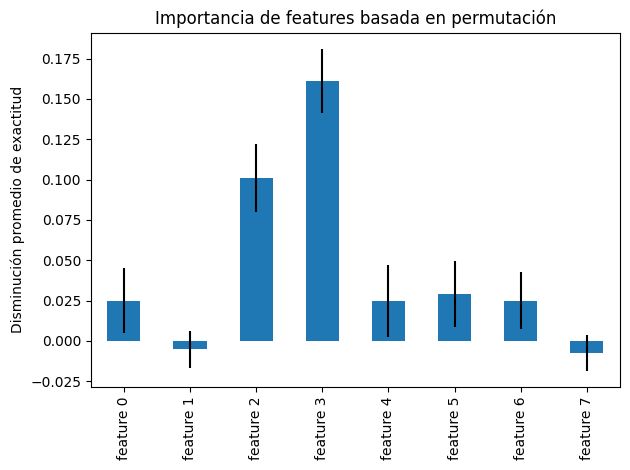

In [116]:
from sklearn.inspection import permutation_importance


result = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

forest_importances = pd.Series(result.importances_mean, index=feature_names)
print("Importancias medidas en permutación")
print(forest_importances)

#Grafica de importancia de features calculado con la funcion de permutacion
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Importancia de features basada en permutación")
ax.set_ylabel("Disminución promedio de exactitud")
fig.tight_layout()
plt.show()

|Feature | Num. de Feature| Característica |
| :---: | :---: | :---:|
|         DBH         |               0              |  Diamétro de tronco principal |
|            Ht       |              1               | Altura |
|           Surv      |               2              | Supervivencia |
|             Vig     |                3             | Vigor |
|             Ins_res |                 4            | Resistencia a insectos |
|             Stem_Fm |                  5           | Forma del tronco principal |
|             Crown_Fm|                  6           | Forma de corona |
|             Brnch_Fm|                  7           | Forma de ramas |

<center><i>Tabla 3. Lista de características disponibles de los árboles ("Features").</i></center>

In [ ]:
#Importar train_test_split function
from sklearn.model_selection import train_test_split
# Definir el dataset en "features" y "labels" 
X=data[['Vig', 'Surv', 'Stem_Fm', 'Crown_Fm', 'DBH']]  #Se usa las features que tuvieron un score de mayor importancia definidas por permutación
y=data['Utility']   #Variable dependiente                                   
#Particionar el dataset en set de entrenamiento y set de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=42, test_size=0.3) # 70% training y 30% test

from sklearn.ensemble import RandomForestClassifier

#Se crea una un clasificador
clf=RandomForestClassifier(n_estimators=100)

#Se entrena con el subset de entrenamiento 
clf.fit(X_train,y_train)

# Prediccion del modelo con el subset de testeo
y_pred=clf.predict(X_test)

#Importar scikit-learn metrics para calculo de exactitud
from sklearn import metrics
#Con que frecuencia el model predice correctamente?
print("Exactitud (Accuracy) ampliando las features seleccionads por permutación:",metrics.accuracy_score(y_test, y_pred))

Exactitud (Accuracy) ampliando las features seleccionads por permutación: 0.6157407407407407


De acuerdo a la permutación, las *features* de mayor importancia serían *Vig*, *Surv* como las dos más importantes, seguidas de  *Stem_Fm*,  *Crown_Fm* y *DBH*. Éstas son el vigor de crecimiento, la supervivencia, seguidos por la forma del tronco principal, la forma de la corona del árbol y el diámetro del tronco.

### Prueba de *features* definidas mediante evaluación de exactitud de Random Forest

#### Medición de exactitud con todas las *features* disponibles.
Primero se genera un modelo de *Random Forest* usando todos las *features*. Este fue el modelo original con el que se comparó el uso de *features* de mayor importancia.


In [117]:
data=pd.read_csv("C:\\Users\\amari\\Desktop\\TP final IA\\eucalyptus_filtered.csv")

X=data[['DBH','Ht','Surv','Vig','Ins_res','Stem_Fm','Crown_Fm','Brnch_Fm']]  # Variables independientes (Features)
y=data['Utility']  # Variable dependiente (Labels)
#Particionar el dataset en set de entrenamiento y set de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=42, test_size=0.3) # 70% training and 30% test

#Importar Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Se crea una un clasificador
clf=RandomForestClassifier(n_estimators=100)

#Se entrena con el subset de entrenamiento 
clf.fit(X_train,y_train)

# Prediccion del modelo con el subset de testeo
y_pred=clf.predict(X_test)
#Importar scikit-learn metrics para calculo de exactitud
from sklearn import metrics
# Con que frecuencia el model predice correctamente?
print("Exactitud (Accuracy):",metrics.accuracy_score(y_test, y_pred))

Exactitud (Accuracy): 0.6527777777777778


### Generación del modelo usando sólo las variables seleccionadas

#### *Features* seleccionadas por MDI
Usando la misma configuración del modelo original, se cargan las sólo las *features* definidas como más importantes por el criterio de MDI. Luego se comparó la exactitud para determinar si éstas son las más influyentes. 

In [118]:
#Importar train_test_split function
from sklearn.model_selection import train_test_split
# Definir el dataset en "features" y "labels" 
X=data[['Vig','Ht','DBH','Surv']]  #Se usa las features que tuvieron un score de mayor importancia definidas por MDI
y=data['Utility']   #Variable dependiente                                   
#Particionar el dataset en set de entrenamiento y set de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=42, test_size=0.3) # 70% training y 30% test

from sklearn.ensemble import RandomForestClassifier

#Se crea una un clasificador
clf=RandomForestClassifier(n_estimators=100)

#Se entrena con el subset de entrenamiento 
clf.fit(X_train,y_train)

# Prediccion del modelo con el subset de testeo
y_pred=clf.predict(X_test)

#Importar scikit-learn metrics para calculo de exactitud
from sklearn import metrics
#Con que frecuencia el model predice correctamente?
print("Exactitud (Accuracy) usando las features de MDI:",metrics.accuracy_score(y_test, y_pred))

Exactitud (Accuracy) usando las features de MDI: 0.5648148148148148


#### *Features* seleccionadas por permutación
Usando la misma configuración del modelo original, se cargan las sólo las *features* definidas como más importantes por el criterio de permutación. Luego se comparó la exactitud para determinar si éstas son las más influyentes. 

In [119]:
#Importar train_test_split function
from sklearn.model_selection import train_test_split
# Definir el dataset en "features" y "labels" 
X=data[['Vig', 'Surv']]  #Se usa las features que tuvieron un score de mayor importancia definidas por permutación
y=data['Utility']   #Variable dependiente                                   
#Particionar el dataset en set de entrenamiento y set de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=42, test_size=0.3) # 70% training y 30% test

from sklearn.ensemble import RandomForestClassifier

#Se crea una un clasificador
clf=RandomForestClassifier(n_estimators=100)

#Se entrena con el subset de entrenamiento 
clf.fit(X_train,y_train)

# Prediccion del modelo con el subset de testeo
y_pred=clf.predict(X_test)

#Importar scikit-learn metrics para calculo de exactitud
from sklearn import metrics
#Con que frecuencia el model predice correctamente?
print("Exactitud (Accuracy) usand las features más importantes por permutación:",metrics.accuracy_score(y_test, y_pred))

Exactitud (Accuracy) usand las features más importantes por permutación: 0.5694444444444444


In [120]:
#Importar train_test_split function
from sklearn.model_selection import train_test_split
# Definir el dataset en "features" y "labels" 
X=data[['Vig', 'Surv', 'Stem_Fm', 'Crown_Fm', 'DBH']]  #Se usa las features que tuvieron un score de mayor importancia definidas por permutación
y=data['Utility']   #Variable dependiente                                   
#Particionar el dataset en set de entrenamiento y set de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=42, test_size=0.3) # 70% training y 30% test

from sklearn.ensemble import RandomForestClassifier

#Se crea una un clasificador
clf=RandomForestClassifier(n_estimators=100)

#Se entrena con el subset de entrenamiento 
clf.fit(X_train,y_train)

# Prediccion del modelo con el subset de testeo
y_pred=clf.predict(X_test)

#Importar scikit-learn metrics para calculo de exactitud
from sklearn import metrics
#Con que frecuencia el model predice correctamente?
print("Exactitud (Accuracy) ampliando las features seleccionads por permutación:",metrics.accuracy_score(y_test, y_pred))

Exactitud (Accuracy) ampliando las features seleccionads por permutación: 0.6157407407407407


Puede observarse que las exactitudes de los modelos donde se utilizan sólo *features* seleccionadas no lograron llegar a ser tan buenas como la exactitud del modelo original. Esto puede significar que a pesar de que hay características con una influencia más clara sobre la utilidad de estos árboles, otras o todas las demás características afectan su utilidad. 

***
## Conclusiones 
En el presente trabajo nos fue posible analizar una base de datos de Eucalyptus obtenido desde Kaggle([Información disponible](https://www.kaggle.com/datasets/ishadss/eucalyptus)). En primer lugar se reemplazaron los valores no determinados y se eliminaron valores atípicos del dataset de trabajo. Una vez establecido el dataset, se procedió a determinar qué características de los *Eucalyptus* son más determinantes para su éxito en el tratamiento de la erosión de los suelos. 
Respecto a los resultados obtenidos, la primera conclusión es que a pesar de que hay características que fueron evaluadas como más determinantes que otras, los modelos generados a partir de éstas no logran tener la misma exactitud que el modelo con el dataset completo. Esto significa que hay otras características que también influyen sobre los resultados de utilidad. Una segunda etapa de análisis y comparación deja una segunda conclusión. Las exactitudes del modelo original y el modelo con las características seleccionadas por permutación teniendo en cuenta *features* con valor menor a las principales valen prácticamente lo mismo. Por otro lado, *Vig* y *Surv* aparecen con valores altos de importancia tanto en la evaluación por MDI como permutación. Esto sugiere que las características de vigor y supervivencia, seguidas en menor medida por la forma del tronco principal, la forma de la corona del árbol y el diámetro del tronco.
En el trabajo original de los investigadores se postularon la supervivencia, la altura y el diámetro del tronco como las principales variables a tener cuenta a la hora de evaluar la utilidad de los *Eucalyptus*. De acuerdo a los resultados de este trabajo deberían agregarse otras variables, como el vigor de crecimiento y valoraciones de morfología del tronco, para evaluar la utilidad de estas especies de árboles.

***
## Referencias
-   *Bulloch, B., 1994. Eucalyptus species selection for soil conservation in seasonally dry hill country - twelfth year assessment. Biological Conservation, 67(3), p.285.*
-   *McQueen, R. J.; Thomson, K., 1996.Machine Learning Applied to Fourteen Agricultural Datasets. Research Report, University of Waikato, p. 17-29*
- *Navlani, A. (2018) Sklearn Random Forest classifiers in python tutorial, DataCamp. DataCamp. Available at: https://www.datacamp.com/tutorial/random-forests-classifier-python (Accessed: December 13, 2022).*
- *Permutation importance vs random forest feature importance (MDI). Available at: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html (Accessed: November 11, 2022).*
- *Permutation feature importance. Available at: https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance (Accessed: November 12, 2022).*
